In [24]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [25]:
#Data split
train = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

train_dataset = train.flow_from_directory("C:/Users/ACER/Desktop/forest_fire_big/Forest_Fire_Dataset/Training/",
                                          target_size = (150,150),
                                          batch_size = 32,
                                          class_mode ="binary")
test_dataset = test.flow_from_directory("C:/Users/ACER/Desktop/forest_fire_big/Forest_Fire_Dataset/Testing/", 
                                       target_size = (150,150),
                                          batch_size = 32,
                                          class_mode ="binary")

Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [26]:
train_dataset.class_indices


{'fire': 0, 'nofire': 1}

In [27]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))


In [28]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [29]:
#fitting model
result=model.fit(train_dataset, epochs = 7, validation_data= test_dataset)

Epoch 1/7
48/48 [==============================] - 9s 157ms/step - loss: 0.3015 - accuracy: 0.8678 - val_loss: 0.1475 - val_accuracy: 0.9474
Epoch 2/7
48/48 [==============================] - 3s 62ms/step - loss: 0.1846 - accuracy: 0.9388 - val_loss: 0.2137 - val_accuracy: 0.8921
Epoch 3/7
48/48 [==============================] - 3s 63ms/step - loss: 0.1435 - accuracy: 0.9533 - val_loss: 0.1111 - val_accuracy: 0.9579
Epoch 4/7
48/48 [==============================] - 3s 69ms/step - loss: 0.1131 - accuracy: 0.9625 - val_loss: 0.1317 - val_accuracy: 0.9500
Epoch 5/7
48/48 [==============================] - 3s 67ms/step - loss: 0.1125 - accuracy: 0.9697 - val_loss: 0.1025 - val_accuracy: 0.9658
Epoch 6/7
48/48 [==============================] - 4s 73ms/step - loss: 0.0967 - accuracy: 0.9658 - val_loss: 0.0966 - val_accuracy: 0.9684
Epoch 7/7
48/48 [==============================] - 3s 66ms/step - loss: 0.0952 - accuracy: 0.9638 - val_loss: 0.0969 - val_accuracy: 0.9658


In [30]:
#prediction
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

12/12 [==============================] - 1s 48ms/step


In [31]:
predictions

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],

In [32]:
print(len(predictions))

380


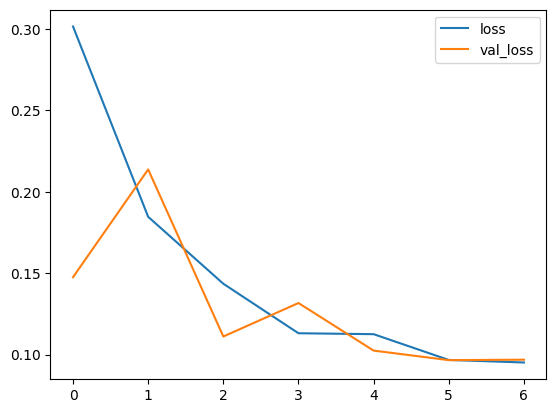

In [33]:
#plotting losses
plt.plot(result.history["loss"],label="loss")
plt.plot(result.history["val_loss"], label = "val_loss")
plt.legend()

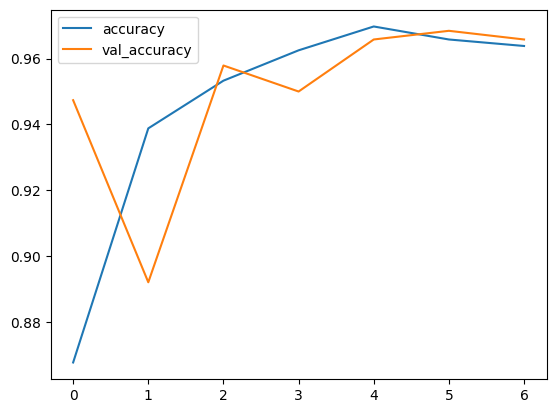

In [34]:
#plotting accuracy
plt.plot(result.history["accuracy"],label="accuracy")
plt.plot(result.history["val_accuracy"], label = "val_accuracy")
plt.legend()

In [35]:
# 7 epochs is lookin great for the loss and accuracy. I will train the model again but this time with 7 epochs...
# so lets check the model in a real image:
def sol_check(sample):
    img = image.load_img(sample, target_size=(150,150))
    plt.imshow(img)
    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis = 0)
    val = model.predict(X)
    print(val)
    if val==1:
        plt.xlabel("Fire Absent", fontsize = 25)
    elif val== 0:
        plt.xlabel("Fire Exists" , fontsize=25)

1/1 [==============================] - 0s 27ms/step
[[1.]]


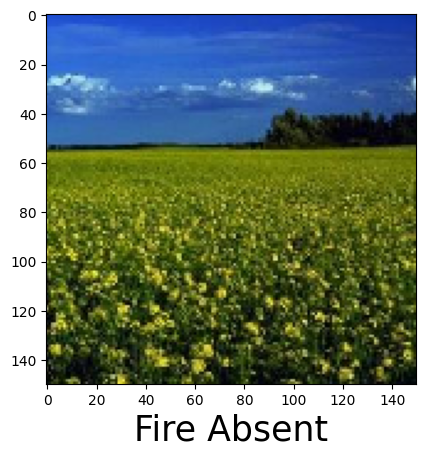

In [37]:
sol_check("C:/Users/ACER/Desktop/forest_fire_detection/forest_fire_data/Testing/nofire/abc354.jpg")